In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [289]:
# Chargement des données
ins_prof_dut = pd.read_csv("../csv/fr-esr-insertion_professionnelle-dut_donnees_nationales.csv", sep=";")
ins_prof_lp = pd.read_csv("../csv//fr-esr-insertion_professionnelle-lp_donnees_nationales.csv", sep=";")
ins_prof_master = pd.read_csv("../csv/fr-esr-insertion_professionnelle-master_donnees_nationales.csv", sep=";")

In [290]:
# Agrégation de toutes les formations (DUT, LP, MASTER)
ins_prof = pd.concat([ins_prof_dut, ins_prof_lp, ins_prof_master], keys=["D", "L", "M"])

In [291]:
ins_prof.head()

Année Diplôme                 situation             Genre  \
D 0  2013     DUT  30 mois après le diplôme            hommes   
  1  2017     DUT  18 mois après le diplôme  femmes et hommes   
  2  2017     DUT  18 mois après le diplôme            hommes   
  3  2017     DUT  18 mois après le diplôme  femmes et hommes   
  4  2017     DUT  18 mois après le diplôme            femmes   

                                           Disciplines Code du domaine  \
D 0  Droit, économie et gestion>Droit>Carrières jur...             DEG   
  1  Sciences, technologies et santé>Informatique>I...             STS   
  2  Sciences, technologies et santé>Informatique>I...             STS   
  3  Sciences humaines et sociales>Information comm...             SHS   
  4  Sciences humaines et sociales>Information comm...             SHS   

                             Domaine Code de la discipline  \
D 0       Droit, économie et gestion                disc02   
  1  Sciences, technologies et santé                disc16   
  2  Sciences, technologies et santé                disc16   
  3    Sciences humaines et sociales                disc10   
  4    Sciences humaines et sociales                disc10   

                    Discipline Sigle  ... Secteur disciplinaire  \
D 0                      Droit   NaN  ...                   NaN   
  1               Informatique   NaN  ...                   NaN   
  2               Informatique   NaN  ...                   NaN   
  3  Information communication   NaN  ...                   NaN   
  4  Information communication   NaN  ...                   NaN   

     Administration publique (hors ens.)  \
D 0                                  NaN   
  1                                  NaN   
  2                                  NaN   
  3                                  NaN   
  4                                  NaN   

    Prof. libérale, indépendant, chef d’entreprise  \
D 0                                            NaN   
  1                                            NaN   
  2                                            NaN   
  3                                            NaN   
  4                                            NaN   

    Contrat de professionnalisation  \
D 0                             NaN   
  1                             NaN   
  2                             NaN   
  3                             NaN   
  4                             NaN   

    La fonction publique (d'etat, territoriale ou hospitalière)  \
D 0                                                NaN            
  1                                                NaN            
  2                                                NaN            
  3                                                NaN            
  4                                                NaN            

    Organisation internationale ou une institution de l'Union européenne  \
D 0                                                NaN                     
  1                                                NaN                     
  2                                                NaN                     
  3                                                NaN                     
  4                                                NaN                     

    Société d'économie mixte Agriculture, sylviculture et pêche  \
D 0                      NaN                                NaN   
  1                      NaN                                NaN   
  2                      NaN                                NaN   
  3                      NaN                                NaN   
  4                      NaN                                NaN   

    Artisan, commerçant, chef d'entreprise  \
D 0                                    NaN   
  1                                    NaN   
  2                                    NaN   
  3                                    NaN   
  4                                    NaN   

    Ingénieur, cadre, prof.

In [292]:
ins_prof.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5920 entries, ('D', 0) to ('M', 2924)
Data columns (total 86 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Année                                                                  5920 non-null   object 
 1   Diplôme                                                                5920 non-null   object 
 2   situation                                                              5920 non-null   object 
 3   Genre                                                                  5920 non-null   object 
 4   Disciplines                                                            5920 non-null   object 
 5   Code du domaine                                                        5920 non-null   object 
 6   Domaine                                                                592

In [293]:
ins_prof.reset_index(inplace=True)

In [294]:
ins_prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 88 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   level_0                                                                5920 non-null   object 
 1   level_1                                                                5920 non-null   int64  
 2   Année                                                                  5920 non-null   object 
 3   Diplôme                                                                5920 non-null   object 
 4   situation                                                              5920 non-null   object 
 5   Genre                                                                  5920 non-null   object 
 6   Disciplines                                                            5920 non-null   o

In [295]:
# Liste des codes du domaine des diplômes
ins_prof["Code du domaine"].unique()

array(['DEG', 'STS', 'SHS', 'ALL', 'LLA', 'MEEF'], dtype=object)

In [296]:
# Délais d'insertion après diplôme
ins_prof["situation"].unique()

array(['30 mois après le diplôme', '18 mois après le diplôme'],
      dtype=object)

In [297]:
# Sélection des variables correspondant aux métiers
df_metier = ins_prof.iloc[:, 32:89]

In [298]:
df_metier

,"Prof. libérale, indépendant,' chef d’entreprise",Fonctionnaire,CDI,CDI de chantier ou CDI de mission,Contrat spécifique au doctorat,CDD,Vacataire,Intérimaire,Intermittent du spectacle,Contrat de professionnalisa tion,...,Secteur disciplinaire,Administration publique (hors ens.),"Prof. libérale, indépendant, chef d’entreprise",Contrat de professionnalisation,"La fonction publique (d'etat, territoriale ou hospitalière)",Organisation internationale ou une institution de l'Union européenne,Société d'économie mixte,"Agriculture, sylviculture et pêche","Artisan, commerçant, chef d'entreprise","Ingénieur, cadre, prof. libérales, prof. intellectuelles sup"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,78,NaN,NaN,14,0,2,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Masters enseignement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5916,NaN,76,8,0,NaN,14,1,0,0,NaN,...,Masters enseignement,2,1,0,89,0,0,0,0,4
5917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Masters enseignement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Masters enseignement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [299]:
# Ajout de l'indication de l'année
df = ins_prof[["Année"]].join(df_metier)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 57 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Année                                                                  5920 non-null   object
 1   Prof. libérale, indépendant,' chef d’entreprise                        860 non-null    object
 2   Fonctionnaire                                                          1502 non-null   object
 3   CDI                                                                    1502 non-null   object
 4   CDI de chantier ou CDI de mission                                      1079 non-null   object
 5   Contrat spécifique au doctorat                                         183 non-null    object
 6   CDD                                                                    1502 non-null   object
 7

In [301]:
# Sélection des types de contrats
df_contrat = df.iloc[:, 0:11]

In [302]:
# Suppression des lignes sans indication du type de contrat
df_contrat.dropna(subset=df_contrat.columns[1:], how='all', inplace=True)

In [303]:
df_contrat

,Année,"Prof. libérale, indépendant,' chef d’entreprise",Fonctionnaire,CDI,CDI de chantier ou CDI de mission,Contrat spécifique au doctorat,CDD,Vacataire,Intérimaire,Intermittent du spectacle,Contrat de professionnalisa tion
1,2017,2,2,78,NaN,NaN,14,0,2,0,3
12,2014,0,46,34,NaN,NaN,11,4,0,0,1
13,2014,4,4,71,NaN,NaN,15,0,3,0,1
14,2019,0,6,72,0,NaN,16,0,5,0,0
15,2019,ns,ns,ns,ns,NaN,ns,ns,ns,ns,ns
...,...,...,...,...,...,...,...,...,...,...,...
5896,2019,NaN,5,47,0,NaN,43,0,3,0,NaN
5897,2019,NaN,5,48,1,NaN,40,1,5,0,NaN
5899,2019,NaN,4,50,1,NaN,35,1,7,0,NaN
5914,2014,NaN,81,8,NaN,NaN,9,1,0,0,NaN


<AxesSubplot:>

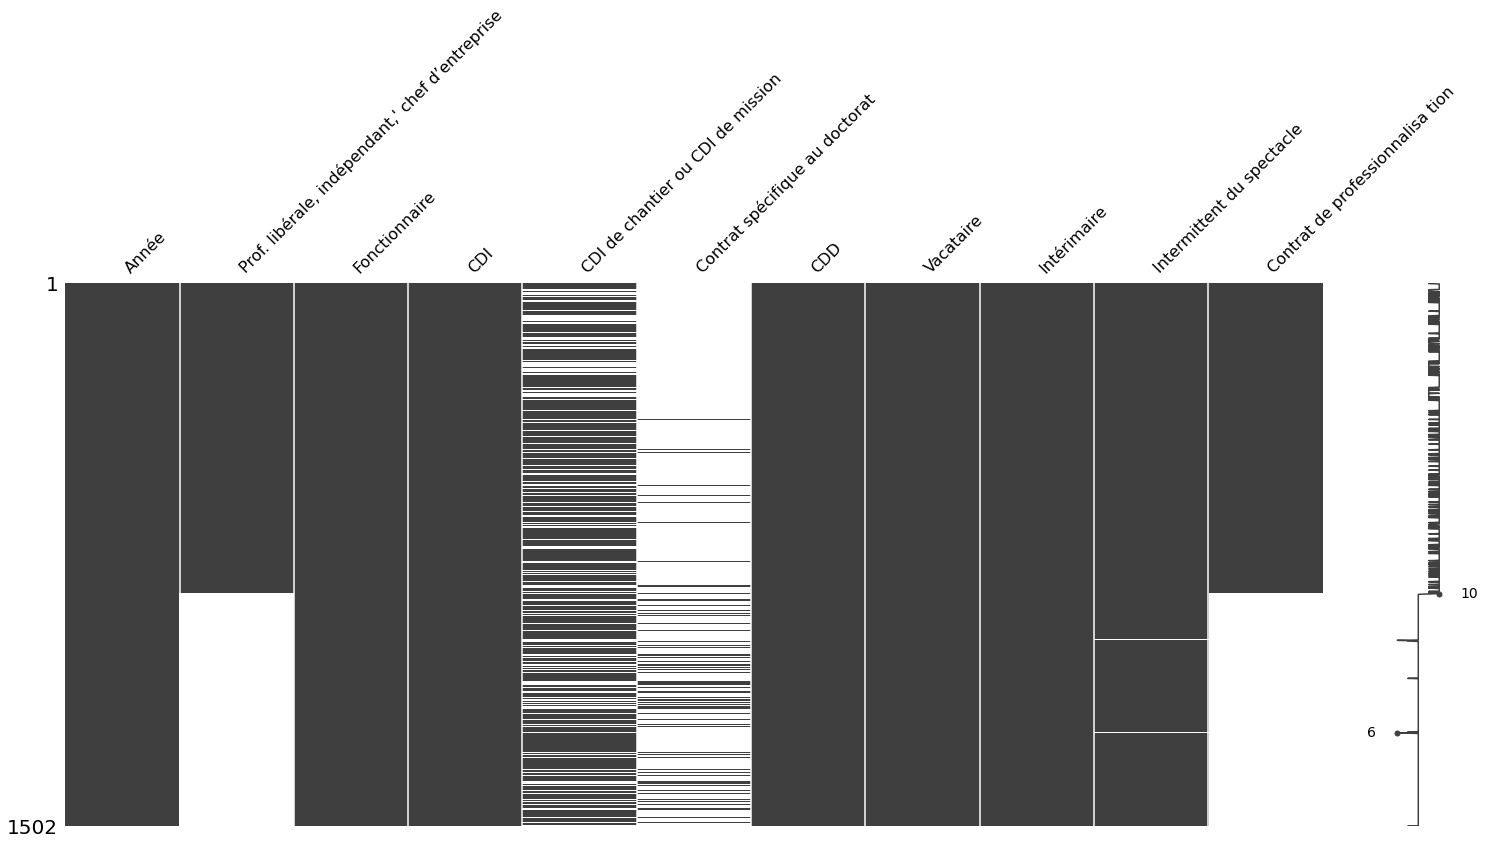

In [304]:
# Recherche des valeurs manquantes par type de contrats
msno.matrix(df_contrat)